<a href="https://colab.research.google.com/github/Dimka322/MyMessager/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests, zipfile, io 
import matplotlib.pyplot as plt 
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving train (1).csv to train (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train (1).csv']))

In [ ]:
df.sample(n=10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8760,2627,184,2.0,59.374842,37.005193,7.0,4,5.0,1960,0.246624,B,B,14,2940,45,NaN,3,6,B,287959.519851
942,4711,6,1.0,41.224118,NaN,0.0,8,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,125612.639104
7428,2137,9,2.0,46.469859,50.703196,9.0,2,12.0,1966,0.310199,B,B,11,2748,1,NaN,0,0,B,159286.262162
3992,14831,21,1.0,35.333602,19.242599,5.0,3,5.0,1966,0.194489,B,B,47,8004,3,125.0,3,5,B,138609.558522
9258,285,6,1.0,48.079764,NaN,0.0,12,25.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,146521.968119
943,3813,12,2.0,55.902977,30.791954,8.0,2,14.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,216409.061045
6333,5350,87,2.0,46.511021,31.601128,5.0,5,9.0,1977,0.100456,B,B,43,7227,0,NaN,1,6,A,195374.148392
9971,16050,67,2.0,58.629682,36.330029,9.0,19,17.0,1989,0.100456,B,B,43,7227,0,NaN,1,6,A,228845.682509
4203,5088,6,1.0,49.684155,5.567502,1.0,12,25.0,2016,0.243205,B,B,5,1564,0,540.0,0,0,B,138230.149386
5300,2571,58,1.0,40.107099,19.773725,7.0,5,14.0,2009,0.050756,B,B,24,5469,1,145.0,0,1,B,155159.651926


In [ ]:
print(df['Price'].mean())
df['Price'].median()

214138.85739873844


192269.64487934904

In [ ]:
df['Ecology_2'] = df['Ecology_2'].apply(lambda x: 1 if x=='A' else 0)

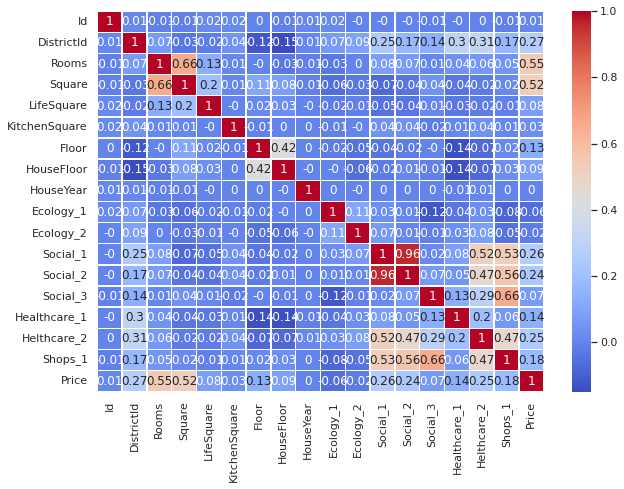

In [ ]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') #оценим влияние переменных на целевую в последней колонке, Rooms и Square имеют заметную силу связи с ценой на недвижимость, год дома в принципе не влияет на показатель цены
                                                                    #Первый и второй социальные показатели местности; показатель местности, связанный со здоровьем; id района близки к умеренной силе связи с ценой. Остальные же либо 
                                                                    #близки к нулю, либо граничные значения слабой силы связи (к примеру Floor - 0.13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


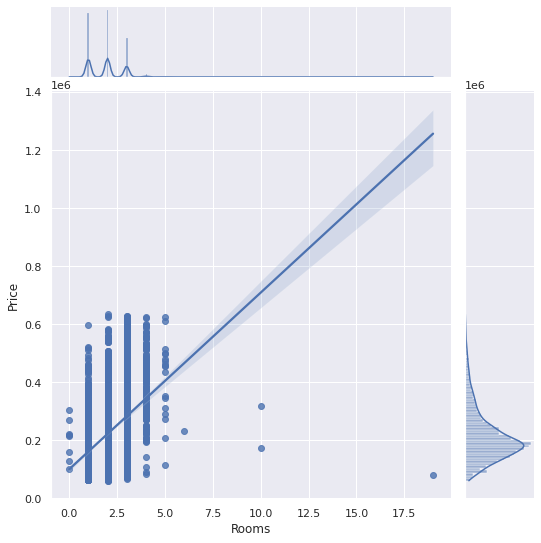

In [ ]:
pl = sns.jointplot(df['Rooms'], df['Price'], kind='reg')
pl.fig.set_figwidth(8)
pl.fig.set_figheight(8)
plt.show() #Нулевая гипотеза - существует линейная зависимость цены на недвижимость от количества комнат, альтернативная - таковой зависимости не существует. Построив график, можно увидеть прямую, указывающую на таковую зависимость, при этом цене присущ нормальный вид распределения, а у комнат присутствует периодичность в распределении

In [ ]:
df['Rooms'].max()

19.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


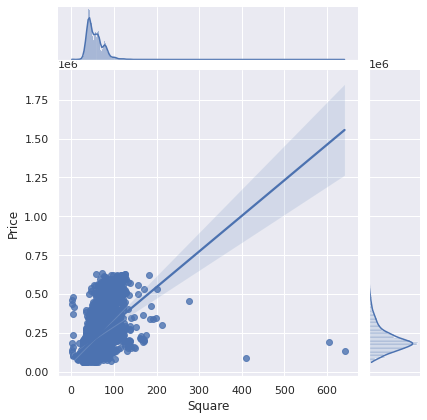

In [ ]:
sns.jointplot(df['Square'], df['Price'], kind='reg')
pl.fig.set_figwidth(8)
pl.fig.set_figheight(8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


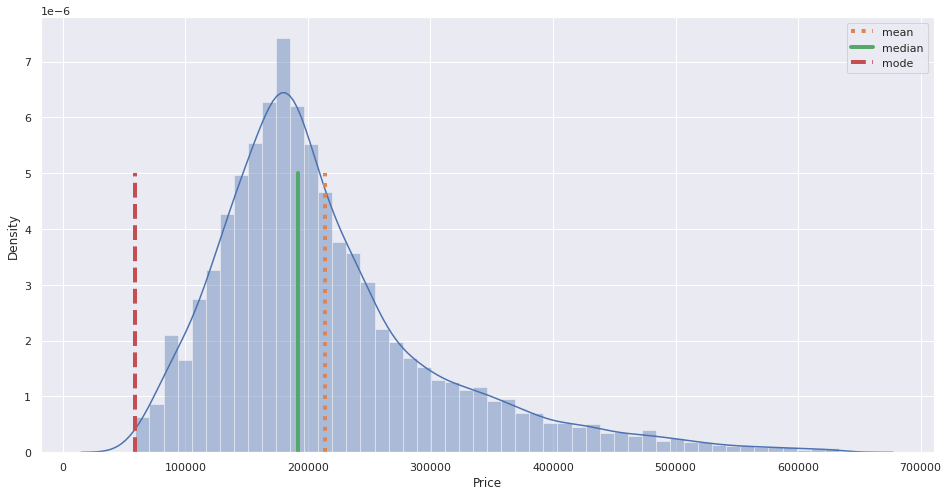

In [ ]:
#проверим распределение цены
target_mean = np.round(df['Price'].mean(), 2)
target_median = np.round(df['Price'].median(), 2)
target_mode = np.round(df['Price'].mode()[0], 2)

plt.figure(figsize=(16, 8))
sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean]*10, y, label='mean', linewidth=4, linestyle=":")
plt.plot([target_median] * 10, y, label='median', linewidth=4, linestyle="-")
plt.plot([target_mode]*10, y, label='mode', linewidth=4, linestyle="--")
plt.legend()
plt.show() #график распределения цены показывает и кривая плотности распределения показывают, что целевая переменная находится в нормальном распределении 

In [ ]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,0,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,B,35,5776,1,2078.0,2,4,B,150226.531644


In [ ]:
df.groupby('Ecology_2')['Price'].head()

0      184966.930730
1      300009.450063
2      220925.908524
3      175616.227217
4      150226.531644
41     197456.920814
200    244351.410236
543    181169.256682
691    162795.113362
720    149725.710441
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


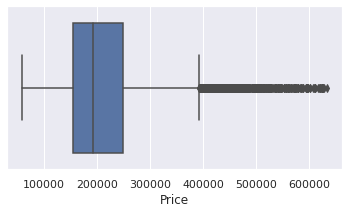

In [ ]:
#исследуем выбросы

plt.figure(figsize=(6, 3))
sns.boxplot(df['Price'], whis=1.5) # для нашей выборки, цена больше 4*10^5 является выбросом

In [ ]:
df_g = df.groupby(['Shops_1', 'Shops_2'])['Price'].mean().reset_index()
df_g.head


,Shops_1,Shops_2,Price
0,0,A,171035.622304
1,0,B,169180.912167
2,1,B,204147.177903
3,2,B,205570.240920
4,3,B,244892.637928
5,4,A,213406.401358
6,4,B,222648.919414
7,5,A,232381.733349
8,5,B,225695.861307
9,6,A,204600.398131


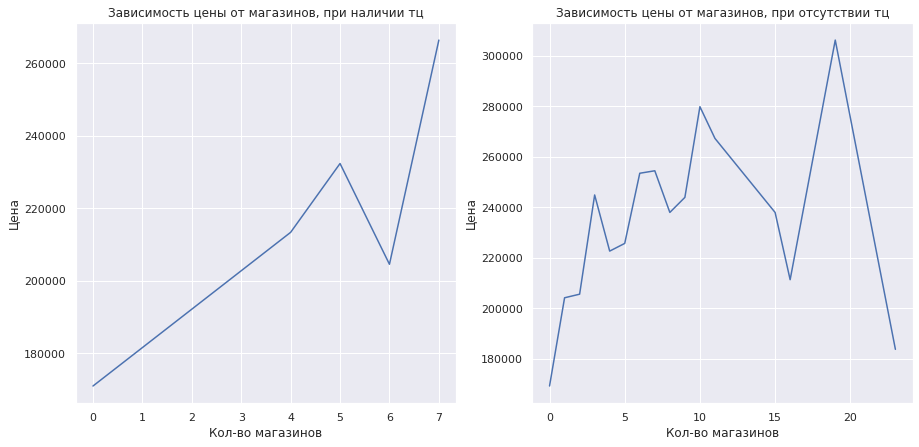

In [ ]:
df_g = df.groupby(['Shops_1', 'Shops_2'])['Price'].mean().reset_index()
data1 = df[df['Shops_2'] == 'A'].groupby('Shops_1')['Price'].mean().reset_index()
data2 = df[df['Shops_2'] == 'B'].groupby('Shops_1')['Price'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(data1['Shops_1'], data1['Price'])
ax[0].set_title('Зависимость цены от магазинов, при наличии тц')
ax[0].set_xlabel('Кол-во магазинов')
ax[0].set_ylabel('Цена')

ax[1].plot(data2['Shops_1'], data2['Price'])
ax[1].set_title('Зависимость цены от магазинов, при отсутствии тц')
ax[1].set_xlabel('Кол-во магазинов')
ax[1].set_ylabel('Цена')

plt.show() #Исследуем зависимость цены от кол-ва магазинов вокруг в двух случаях: наличие и отсутсвтие тц. В первом случае цена растет при увеличении кол-ва магазинов (несмотря на выброс в пункте 6), в другом же случае зависимость установить нельз, потму что цена носит здесь переменный характер (скачет вверх=вниз)

In [ ]:
df[(df['Shops_1'] == 6) & (df['Shops_2']=='A')]['Price'].sort_values(ascending=False)

3922    323403.476961
2502    320744.631742
4344    302116.932785
5178    272178.749159
181     269995.002780
            ...      
7746    148213.988032
8069    139040.841327
1307    127990.151007
8797     88513.513254
7089     86975.007476
Name: Price, Length: 62, dtype: float64

Text(0, 0.5, 'Цена')

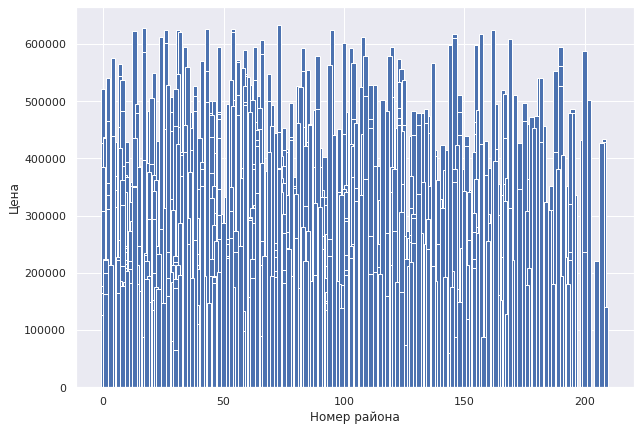

In [ ]:
dis = df.groupby('DistrictId')['Price'].mean().reset_index()
#dis.head()
plt.figure(figsize=(10, 7))

plt.bar(df['DistrictId'], df['Price'], width= 1.8)
plt.xlabel('Номер района')
plt.ylabel('Цена')
plt.label('Взаимоотношение цены и номера района') #Проверим взаимосвязь номера района и цены на недвижимость в нем: определенные районы обладают пиковыми значениями по цене в выборке => недвижимость в них стоит дороже, в обратоном же случае цена может быть низкой из-за номера района

In [ ]:
dis

,DistrictId,Price
0,0,195295.590075
1,1,187805.401737
2,2,243688.618402
3,3,179905.016194
4,4,300096.687440
...,...,...
200,202,394150.861857
201,205,220501.566180
202,207,426186.409334
203,208,431137.654083


In [ ]:
df.groupby(['Social_1', 'Social_2'])['Price'].mean().reset_index().head(n=10)

,Social_1,Social_2,Price
0,0,168,102615.164922
1,0,186,191254.421672
2,1,264,188591.230600
3,1,290,98525.856679
4,1,388,89348.479018
5,2,469,169349.001333
6,2,475,137572.353084
7,2,507,86540.216330
8,2,528,431238.467011
9,2,568,87985.579420


In [ ]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,0,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,0,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,0,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,0,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,0,A,30,5048,9,325.0,2,5,B,181595.339808
